In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

### Leitura dos dados
- Dados provenientes do site Kaggle
- https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
- Dataset previamente dividido em treino e teste

Carregamento dos dados

In [2]:
celltrain = pd.read_csv('cellphone-data-train.csv')
celltest = pd.read_csv('cellphone-data-test.csv')

Dicionário de dados

<div>
    <table>
  <tr>
    <th><span style='background-color:lightgrey'>battery_power:</span></th>
    <th><span style='background-color:lightgrey'>blue:</span></th>
    <th><span style='background-color:lightgrey'>clock_speed:</span></th>
    <th><span style='background-color:lightgrey'>dual_sim:</span></th>
    <th><span style='background-color:lightgrey'>fc:</span></th>
    <th><span style='background-color:lightgrey'>four_g:</span></th>
    <th><span style='background-color:lightgrey'>int_memory:</span></th>
  </tr>
  <tr>
    <td>Total energy a battery can store in one time measured in mAh</td>
    <td>Has bluetooth or not</td>
    <td>speed at which microprocessor executes instructions</td>
    <td>Has dual sim support or not</td>
    <td>Front Camera mega pixels</td>
    <td>Has 4G or not</td>
    <td>Internal Memory in Gigabytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>m_dep:</span></th>
    <th><span style='background-color:lightgrey'>mobile_wt:</span></th>
    <th><span style='background-color:lightgrey'>n_cores:</span></th>
    <th><span style='background-color:lightgrey'>pc:</span></th>
    <th><span style='background-color:lightgrey'>px_height:</span></th>
    <th><span style='background-color:lightgrey'>px_width:</span></th>
    <th><span style='background-color:lightgrey'>ram:</span></th>
  </tr>
  <tr>
    <td>Mobile Depth in cm</td>
    <td>Weight of mobile phone</td>
    <td>Number of cores of processor</td>
    <td>Primary Camera mega pixels</td>
    <td>Pixel Resolution Height</td>
    <td>Pixel Resolution Width</td>
    <td>Random Access Memory in Mega Bytes</td>
  </tr>
  <tr>
    <th><span style='background-color:lightgrey'>sc_h:</span></th>
    <th><span style='background-color:lightgrey'>sc_w:</span></th>
    <th><span style='background-color:lightgrey'>talk_time:</span></th>
    <th><span style='background-color:lightgrey'>three_g:</span></th>
    <th><span style='background-color:lightgrey'>touch_screen:</span></th>
    <th><span style='background-color:lightgrey'>wifi:</span></th>
    <th><span style='background-color:lightgrey'>price_range:</span></th>
  </tr>
  <tr>
    <td>Screen Height of mobile in cm</td>
    <td>Screen Width of mobile in cm</td>
    <td>longest time that a single battery charge will last when you are</td>
    <td>Has 3G or not</td>
    <td>Has touch screen or not</td>
    <td>Has wifi or not</td>
    <td>This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</td>
  </tr>
</table>
</div>

Primeiros registros

In [33]:
celltrain.head(3)
print(f'celltrain shape:{celltrain.shape}')

celltrain shape:(2000, 21)


Resumo sobre os dados
    
OBS:
battery_power, fc, int_memory, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time são passíveis de normalização, pois destoam das demais ordens de grandeza.


In [11]:
celltrain.info()
celltrain.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Histogramas de cada atributo
    
OBS: 
    -há um percential de 50% de telefones com baixo clock (<1.5Ghz), câmera frontal de baixa resolução (<3MP), baixa memória interna (<30GB) e pequeno comprimento de tela (<5cm). Provavelmente se refere a telefones mais antigos.
    

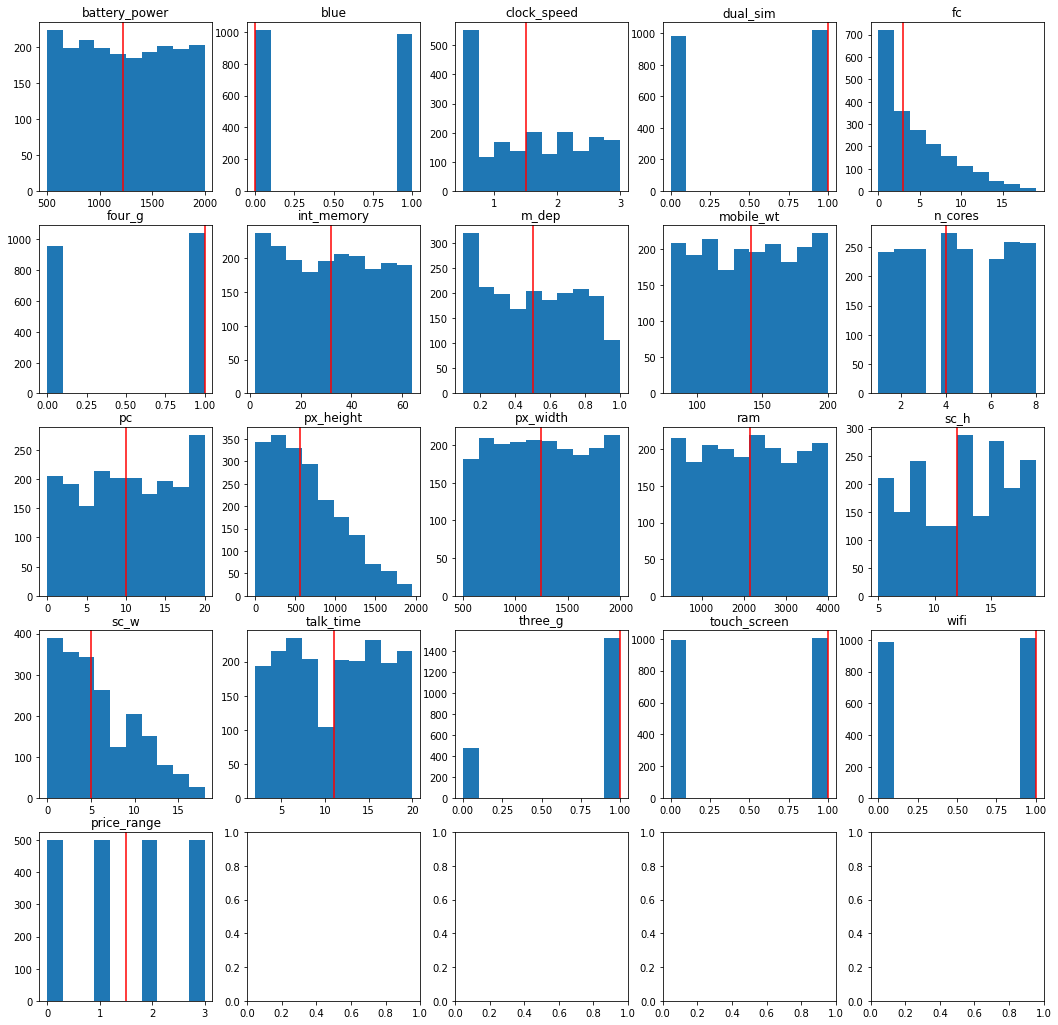

In [34]:
def plot_histograms(df):
    rows = 5
    cols = 5
    fig, axs = plt.subplots(rows,cols,figsize=(18,18))
    for i,nf in enumerate(df.columns):
        axs[i//cols, i%cols].hist(df[nf])
        axs[i//cols, i%cols].set_title(nf)
        axs[i//cols, i%cols].axvline(df[nf].quantile(0.5), color='red')
plot_histograms(celltrain)

Feature engineering: polegadas e densidade de pixels(pixels por polegada)
    
OBS:observa-se que há uma porcentagem de 50% de smartphones com baixa densidade de pixels (<300ppi).

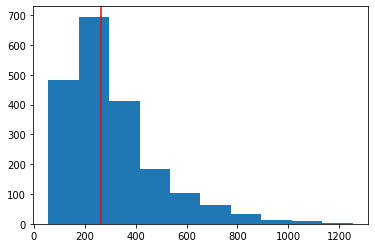

In [40]:
#polegadas
celltrain['pol'] = ((celltrain['sc_w'] ** 2 + celltrain['sc_h'] ** 2) ** 0.5) / 2.54

#pixels por polegada
celltrain['ppi'] = ((celltrain['px_width'] ** 2 + celltrain['px_height'] ** 2) ** 0.5) / celltrain['pol']
celltrain.head(5)

plt.hist(celltrain['ppi']);
plt.axvline(celltrain['ppi'].quantile(0.5), color='red')

Correlação:0.40310101902598583


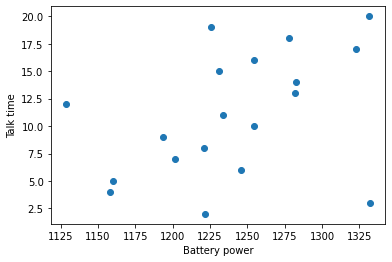

In [61]:
grp = celltrain.groupby(by=['talk_time'])['battery_power'].mean()
x = pd.Series(grp.index) #talk time
y = pd.Series(grp.values) #battery power
plt.scatter(y,x) #battery power x talk time
plt.xlabel('Battery power')
plt.ylabel('Talk time')
print(f'Correlação:{x.corr(y)}')